In [165]:
import time
import bs4 as bs
from urllib.request import urlopen
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline  
plt.rcParams['figure.figsize'] = [10, 5]

In [9]:
API_KEY='GMvpceUIcnyE987JjLQjQxEoa1wPThWnbiFQno4q7KTZvR7lXGJzBE4plFaZUVt0xBPrBuJijZEQpB2eyTgIi7w1VClM_V_mveRe7vUK9w90Hc31Gw9Y84o2UzHNXXYx'
ENDPOINT= 'https://api.yelp.com/v3/businesses/search'
ENDPOINT2='https://api.yelp.com/v3/businesses/'
HEADER= {'Authorization': 'bearer %s' %API_KEY}
#offset=range(0,150,50)
#Define a parameter
##I chose the Stockmann Department Store as the center and find restaurant that is nearby. So the distances might be different from those of other people

In [10]:
def get_bizsearch(offset):
    """Call the yelp api for business search based on search term and location and return the information of businesses"""
    PARAMETERS = {'term': ' Breakfast & Brunch',
             'limit': 50,
               'offset': offset,
             'location': 'Helsinki',
              'latitude': 60.2126506118488,
              'longitude': 25.0854241847992
             }
    response = requests.get(url=ENDPOINT, params = PARAMETERS, headers = HEADER)
    data=response.json()
    return data['businesses']

In [11]:
def is_weekend(bizID):
    """Use business id provide to get more opening hours. 
    Return 1 for opening on Saturdays & Sunday. Otherwise 0"""
    try:
        response=requests.get(url=ENDPOINT2+bizID, headers=HEADER)
        data=response.json()
        opening_hours=data['hours'][0]['open']
        if (opening_hours[-1]['day']==6)&(opening_hours[-2]['day']==5):
            return 1
        else:
            return 0
    except:
        return np.nan

In [12]:
##Call the function get_bizsearch to get data and append each of its elements into a list
ravin_data=[]
for offset in [0,50,100]:
    #print(offset)
    data=get_bizsearch(offset)
    for i in range(len(data)):
        ravin_data.append(data[i])

In [17]:
print(json.dumps(ravin_data[1], indent=4))

{
    "rating": 4.0, 
    "review_count": 29, 
    "name": "Caf\u00e9 Engel", 
    "transactions": [], 
    "url": "https://www.yelp.com/biz/caf%C3%A9-engel-helsinki-2?adjust_creative=62mMvFZbT04BOA8UBSes-w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=62mMvFZbT04BOA8UBSes-w", 
    "price": "\u20ac\u20ac", 
    "distance": 8848.372773151015, 
    "coordinates": {
        "latitude": 60.1689979245312, 
        "longitude": 24.9515845722941
    }, 
    "alias": "caf\u00e9-engel-helsinki-2", 
    "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/tyND9M_i1eKh7D5HCznwUw/o.jpg", 
    "categories": [
        {
            "alias": "coffee", 
            "title": "Coffee & Tea"
        }, 
        {
            "alias": "breakfast_brunch", 
            "title": "Breakfast & Brunch"
        }
    ], 
    "display_phone": "+358 9 652776", 
    "phone": "+3589652776", 
    "id": "N7TVSLbZOORovW-Pty7GSA", 
    "is_closed": false, 
    "location": {
        "city": "Hels

In [13]:
#Creating a dictionary of variables
##Price variable: the number indicates number of euro signs that restaurant have. For example: 1 means €
restaurants={'name':[], 'review_counts':[],'ratings':[], 'price':[], 'distance':[],'id':[]}

for bis in ravin_data:
    restaurants['id'].append(bis['id'])
    restaurants['name'].append(bis['name'])
    restaurants['review_counts'].append(bis['review_count'])
    restaurants['ratings'].append(bis['rating'])
    restaurants['distance'].append(bis['distance'])
    try:
        restaurants['price'].append(len(bis['price']))
    except:
        restaurants['price'].append(np.nan)

In [7]:
#Turn the dictionary into the dataframe
restaurantsdf=pd.DataFrame.from_dict(restaurants)
col_index=['id','name','price','ratings','review_counts', 'distance']
restaurantsdf = restaurantsdf.reindex(columns=col_index)
restaurantsdf.head()

,id,name,price,ratings,review_counts,distance
0,1npeFnHPBl2yFhcKY9gLfA,Fleuriste,2.0,4.5,19,9602.317171
1,N7TVSLbZOORovW-Pty7GSA,Café Engel,2.0,4.0,29,8848.372773
2,f2rN0Jn8v2JaM-XN4NdDxQ,SIS. Deli & Cafe,2.0,4.5,17,9490.426238
3,--Y8vvqTZ0IK0GqNNgM8Kg,Karl Fazer Café,2.0,4.0,100,9046.886510
4,mgr2kkZ9RWN3QhnyaIqt0w,Banu Cafe,NaN,5.0,2,11486.550765


In [8]:
len(restaurantsdf)

142

In [10]:
##Call the function is_weekend to derive the information on whether or not the restaurant is open on Saturdays and Sundays
restaurantsdf["weekend_open"]=''
for i in range(len(restaurantsdf)):
    bizID=restaurantsdf['id'][i]
    restaurantsdf["weekend_open"][i]=is_weekend(bizID)

/Users/hienn/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
restaurantsdf.head()

,id,name,price,ratings,review_counts,distance,weekend_open
0,1npeFnHPBl2yFhcKY9gLfA,Fleuriste,2.0,4.5,19,9602.317171,0
1,N7TVSLbZOORovW-Pty7GSA,Café Engel,2.0,4.0,29,8848.372773,1
2,f2rN0Jn8v2JaM-XN4NdDxQ,SIS. Deli & Cafe,2.0,4.5,17,9490.426238,1
3,--Y8vvqTZ0IK0GqNNgM8Kg,Karl Fazer Café,2.0,4.0,100,9046.886510,1
4,mgr2kkZ9RWN3QhnyaIqt0w,Banu Cafe,NaN,5.0,2,11486.550765,NaN


In [14]:
##Export to csv file so that I dont have to call api everytime I work on the project
restaurantsdf.to_csv('restaurants_df.csv', encoding='utf-8', index=False)

In [77]:
##Read the csv file
restaurantsdf=pd.read_csv('restaurants_df.csv')
restaurantsdf.head()

,id,name,price,ratings,review_counts,distance,weekend_open
0,1npeFnHPBl2yFhcKY9gLfA,Fleuriste,2.0,4.5,19,9602.317171,0.0
1,N7TVSLbZOORovW-Pty7GSA,Café Engel,2.0,4.0,29,8848.372773,1.0
2,f2rN0Jn8v2JaM-XN4NdDxQ,SIS. Deli & Cafe,2.0,4.5,17,9490.426238,1.0
3,--Y8vvqTZ0IK0GqNNgM8Kg,Karl Fazer Café,2.0,4.0,100,9046.886510,1.0
4,mgr2kkZ9RWN3QhnyaIqt0w,Banu Cafe,NaN,5.0,2,11486.550765,NaN


In [78]:
##Now since all necessary information has been gathered. It's time to pick top 5 restaurants. I dropped the 'Accept Credit Card', because I think nowadays all restaurants accept credit card payments.
##All restaurants with the average pricefrom 8-20 euros
aver_price=restaurantsdf[(restaurantsdf['price']<=2)] 
#and (restaurantsdf['review_counts']>=5) and (restaurantsdf['weekend_open']==1)]  
review_based=aver_price[aver_price['review_counts']>=5]
weekend_based=review_based[review_based['weekend_open']==1]

In [79]:
## Sorting restaurants based on rating
weekend_based=weekend_based.sort_values(by=['review_counts', 'ratings','price'],ascending=False)
weekend_based

,id,name,price,ratings,review_counts,distance,weekend_open
3,--Y8vvqTZ0IK0GqNNgM8Kg,Karl Fazer Café,2.0,4.0,100,9046.886510,1.0
80,PVtmj1xR1awDajKZXqZOvw,Johan & Nyström,1.0,4.5,62,8402.943583,1.0
67,P5fKuEGN17XgvRGfGNHKVQ,Cafe Bar 9,2.0,4.0,62,9538.284490,1.0
111,NW2Fz4KIs3e_MVnyQirsfA,Vapiano,2.0,3.5,54,9022.622656,1.0
50,h0G_C0ihiFErISdZGEXVsw,Brooklyn Cafe,1.0,4.5,43,9826.523550,1.0
12,A837LlN8WXNz9ZN-RSK_cg,La Torrefazione,2.0,4.0,39,9231.139453,1.0
35,CnJMsPrW_gUWnIwMfjO-CA,Café Esplanad,2.0,4.0,32,9264.371718,1.0
33,dJicRWeTL0BrVUNnMDyLGA,Ursula,2.0,4.0,30,9392.960876,1.0
1,N7TVSLbZOORovW-Pty7GSA,Café Engel,2.0,4.0,29,8848.372773,1.0
16,kwFWA6PgOndvZWgR5GMYlQ,Tin Tin Tango,2.0,4.0,29,9638.189178,1.0


In [136]:
##I decided to drop the restaurants that have less than 4 stars.
ratings_over4=weekend_based[weekend_based['ratings']>=4]
ratings_over4['accept_credit_card']='' #Create a new columns
ratings_over4.head()

-c:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,name,price,ratings,review_counts,distance,weekend_open,accept_credit_card
3,--Y8vvqTZ0IK0GqNNgM8Kg,Karl Fazer Café,2.0,4.0,100,9046.886510,1.0,
80,PVtmj1xR1awDajKZXqZOvw,Johan & Nyström,1.0,4.5,62,8402.943583,1.0,
67,P5fKuEGN17XgvRGfGNHKVQ,Cafe Bar 9,2.0,4.0,62,9538.284490,1.0,
50,h0G_C0ihiFErISdZGEXVsw,Brooklyn Cafe,1.0,4.5,43,9826.523550,1.0,
12,A837LlN8WXNz9ZN-RSK_cg,La Torrefazione,2.0,4.0,39,9231.139453,1.0,


In [138]:
ratings_over4.reset_index(inplace=True, drop=True)
ratings_over4.head()

,id,name,price,ratings,review_counts,distance,weekend_open,accept_credit_card
0,--Y8vvqTZ0IK0GqNNgM8Kg,Karl Fazer Café,2.0,4.0,100,9046.886510,1.0,
1,PVtmj1xR1awDajKZXqZOvw,Johan & Nyström,1.0,4.5,62,8402.943583,1.0,
2,P5fKuEGN17XgvRGfGNHKVQ,Cafe Bar 9,2.0,4.0,62,9538.284490,1.0,
3,h0G_C0ihiFErISdZGEXVsw,Brooklyn Cafe,1.0,4.5,43,9826.523550,1.0,
4,A837LlN8WXNz9ZN-RSK_cg,La Torrefazione,2.0,4.0,39,9231.139453,1.0,


In [99]:
#Now it's time to check if our top 5 restaurant has the 'Accept Credit Cards" option
def get_info(bizid):
    link='https://www.yelp.com/biz/'+bizid
    source=urlopen(link)
    soup=bs.BeautifulSoup(source,'html.parser')
    accept_card=soup.find_all('span',{'class':'lemon--span__373c0__3997G text__373c0__2pB8f text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_'})

    yes_no=soup.find_all('span',{'class':'lemon--span__373c0__3997G text__373c0__2pB8f text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_ text-weight--bold__373c0__3HYJa'})
    return (accept_card[-5].text,yes_no[-5].text)

In [153]:
for i in range(5):
    bizid=ratings_over4['id'][i]
    accept_card,yes_no=get_info(bizid)
    if yes_no.text=='\xa0Yes':
        ratings_over4['accept_credit_card'][i]=1
    else:
        ratings_over4['accept_credit_card'][i]=0
    time.sleep(180)

-c:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hienn/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [134]:
yes_no

<span class="lemon--span__373c0__3997G text__373c0__2pB8f text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_ text-weight--bold__373c0__3HYJa"> <!-- -->Yes</span>

In [158]:
top5=ratings_over4[0:5]
top5.to_csv('top5_restaurant.csv',encoding='utf-8', index=False)

In [159]:
top5

,id,name,price,ratings,review_counts,distance,weekend_open,accept_credit_card
0,--Y8vvqTZ0IK0GqNNgM8Kg,Karl Fazer Café,2.0,4.0,100,9046.886510,1.0,1
1,PVtmj1xR1awDajKZXqZOvw,Johan & Nyström,1.0,4.5,62,8402.943583,1.0,1
2,P5fKuEGN17XgvRGfGNHKVQ,Cafe Bar 9,2.0,4.0,62,9538.284490,1.0,1
3,h0G_C0ihiFErISdZGEXVsw,Brooklyn Cafe,1.0,4.5,43,9826.523550,1.0,1
4,A837LlN8WXNz9ZN-RSK_cg,La Torrefazione,2.0,4.0,39,9231.139453,1.0,1


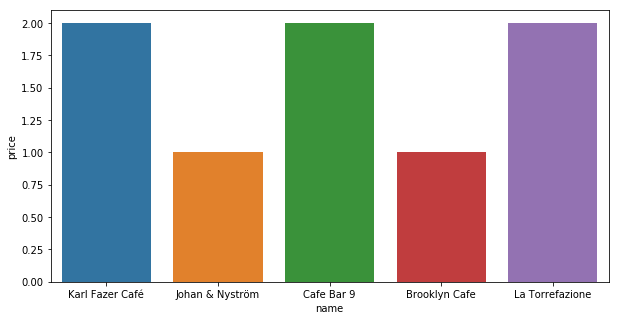

In [166]:
sns.barplot(x=top5['name'], y=top5['price']);

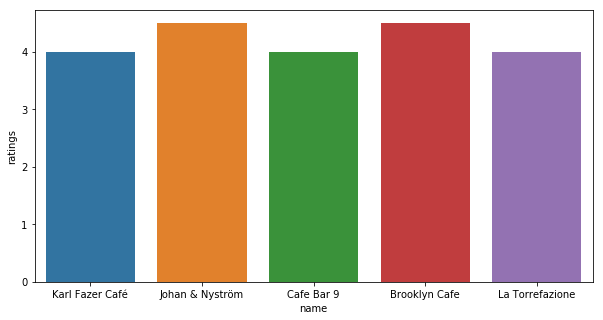

In [167]:
sns.barplot(x=top5['name'], y=top5['ratings']);

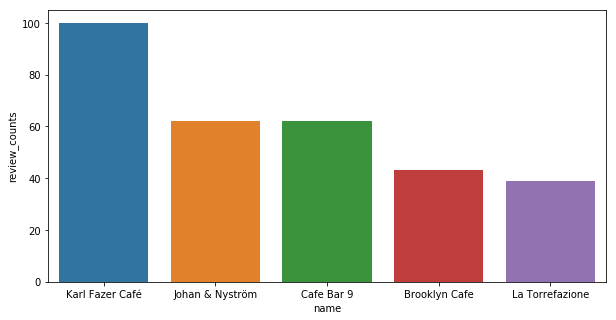

In [168]:
sns.barplot(x=top5['name'], y=top5['review_counts']);

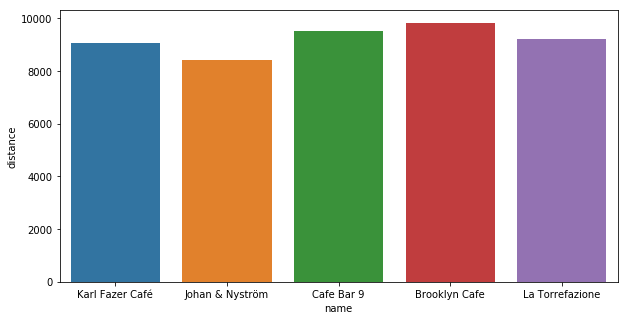

In [169]:
sns.barplot(x=top5['name'], y=top5['distance']);